# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Marketing Outcome Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Marketing Dataset**

**Features**:

- `age`: Age of customer.
- `job`: Job of customer.
- `marital`: marital status .
- `education`: education background.
- `default_value`: whether customer is default or not.
- `balance`: current balance.
- `housing`: housing status .
- `loan`: Whether customer is having loan or not .
- `contact`: contact type .
- `day_of_month`: day of month for contacting .
- `month_of_year`: month of year for contacting .
- `duration`: duration .
- `campaign`: campaign.
- `pdays`: pdays .
- `previous`: previous customer or not.
- `poutcome`: previous outcome.

**Target Variable**:

- `deposit`: Whether customer will opt for Term Deposit Suscriptions or not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict term deposit suscriptions from customer.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'day_of_month' feature :
    - Aim is to treat 'day_of_month' as categorical variable rather than numerical and check how different groups will impact prediction.
- Ordinal encoding on 'education' and 'job' features :
    - Aim is to get education and job features encoded with rank rather than default encoding i.e., one-hot encoding.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_marketing')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_marketing")

In [6]:
# first 5 rows
bank_df.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
19,student,single,secondary,no,372,no,no,telephone,8,jul,444,3,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes


In [7]:
# bank_df dataset
bank_df.shape

(11162, 17)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit,sampleid
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes,1
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes,1
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no,1
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes,2
19,student,single,primary,no,608,no,no,cellular,12,may,236,1,180,2,success,yes,2
19,student,single,primary,no,134,no,no,cellular,27,mar,271,2,-1,0,unknown,yes,1
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes,1
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes,1
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes,1
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes,2


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8930, 17)

In [12]:
# test data shape
bank_df_test.shape

(2232, 17)

In [13]:
#train dataset
bank_df_train.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
18,student,single,unknown,no,108,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
19,student,single,unknown,no,60,no,no,cellular,14,aug,253,1,-1,0,unknown,no
19,student,single,unknown,no,108,no,no,cellular,9,mar,273,2,182,1,success,yes
19,student,single,secondary,no,55,no,no,telephone,6,oct,89,2,193,1,other,no
18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes


In [14]:
# test dataset
bank_df_test.head()

age,job,marital,education,default_value,balance,housing,loan,contact,day_of_month,month_of_year,duration,campaign,pdays,previous,poutcome,deposit
19,student,single,secondary,no,329,no,no,cellular,22,oct,252,2,-1,0,unknown,yes
19,student,single,primary,no,608,no,no,cellular,12,may,236,1,180,2,success,yes
19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
20,student,single,secondary,no,215,no,no,cellular,21,aug,228,4,183,1,other,yes
21,blue-collar,single,secondary,no,2265,no,no,cellular,17,feb,92,2,-1,0,unknown,yes
21,student,single,unknown,no,53,no,no,cellular,14,jun,270,1,-1,0,unknown,yes
20,student,single,secondary,no,215,no,no,cellular,24,nov,325,1,95,5,success,yes
19,student,single,secondary,no,329,no,no,cellular,30,apr,169,1,190,2,success,yes
18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes


In [15]:
AutoClassifier.generate_custom_config("custom_bank_marketing")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  1

Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Feat

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluding svm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1' and max_models to 5
# and verbose level 2 for detailed loggging
# Using custom config file for custom run

aml = AutoClassifier(exclude=['svm'],
                     stopping_metric='MICRO-F1', 
                     stopping_tolerance=0.60,
                     max_models=5,
                     verbose=2,
                     custom_config_file='custom_bank_marketing.json')


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "day_of_month": {
            "Type": "Equal-Width",
            "NumOfBins": 4
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "OrdinalEncodingIndicator": true,
        "OrdinalEncodingList": [
            "education",
            "job"
        ]
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 8930
Total Columns in the data: 17

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
pdays,BIGINT,8930,0,None,0,2293,6637,0.0,100.0
housing,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
campaign,BIGINT,8930,0,None,0,8930,0,0.0,100.0
education,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
month_of_year,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
poutcome,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
deposit,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
job,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
marital,VARCHAR(20) CHARACTER SET LATIN,8930,0,0,None,None,None,0.0,100.0
balance,BIGINT,8930,0,None,616,7781,533,0.0,100.0



Statistics of Data:


func,age,balance,day_of_month,duration,campaign,pdays,previous
50%,39,556,15,255,2,-1,0
count,8930,8930,8930,8930,8930,8930,8930
mean,41.291,1508.917,15.662,370.4,2.524,52.287,0.844
min,18,-6847,1,2,1,-1,0
max,95,81204,31,3284,63,828,58
75%,49,1704.75,22,493,3,46.75,1
25%,32,126.25,8,138,1,-1,0
std,11.946,3142.946,8.436,343.339,2.779,109.702,2.323



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
job                       12        
marital                   3         
education                 4         
default_value             2         
housing                   2         
loan                      2         
contact                   3         
month_of_year             12        
poutcome                  4         
deposit                   2         

No Futile columns found.

Target Column Distribution:


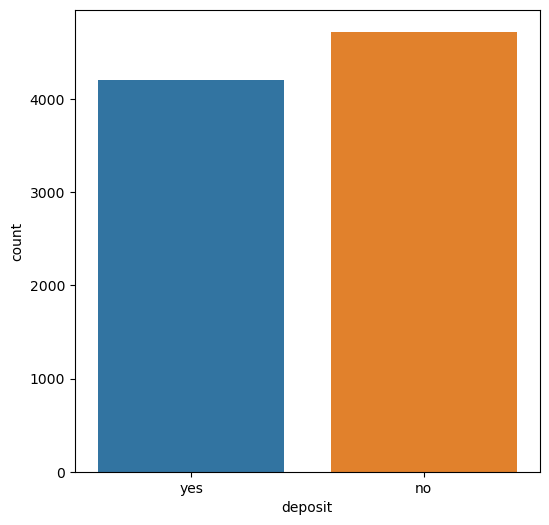

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0   previous          11.478163
1        age           1.578947
2   campaign           5.475924
3   duration           5.834267
4      pdays          17.637178
5    balance           9.328108


Analysis completed. No action taken.                                                    


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265428753856"'- 1/22
Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262708106143"' - 4/22


duration,loan,age,previous,deposit,pdays,job,poutcome,id,default_value,month_of_year,housing,education,balance,marital,campaign,contact,day_of_month
938,no,41,0,1,-1,services,unknown,2941,no,feb,yes,secondary,840,divorced,1,cellular,day_of_month_1
122,yes,40,0,0,-1,admin.,unknown,474,no,jul,yes,secondary,1395,married,2,cellular,day_of_month_1
122,yes,33,0,0,-1,management,unknown,4977,no,may,yes,tertiary,455,married,10,unknown,day_of_month_4
122,no,51,5,1,92,management,success,4351,no,feb,no,tertiary,346,married,1,cellular,day_of_month_2
122,no,49,0,0,-1,technician,unknown,109,no,jun,yes,secondary,1202,single,1,unknown,day_of_month_3
122,no,58,0,0,-1,housemaid,unknown,5166,no,jul,yes,primary,435,married,6,telephone,day_of_month_4
122,no,28,0,0,-1,self-employed,unknown,4270,no,oct,no,tertiary,1579,single,3,cellular,day_of_month_2
1203,no,38,1,1,306,housemaid,failure,1180,no,may,yes,primary,199,single,1,cellular,day_of_month_2
938,no,34,0,1,-1,blue-collar,unknown,2321,no,aug,no,secondary,182,married,2,cellular,day_of_month_1
938,no,29,0,1,-1,management,unknown,6244,no,may,no,tertiary,314,married,2,unknown,day_of_month_4


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 22% - 5/22


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269200717780"' - 6/22


loan,duration,age,previous,deposit,pdays,poutcome,id,month_of_year,default_value,housing,balance,marital,campaign,day_of_month,contact,education,job
yes,774,37,0,0,-1,unknown,5378,may,no,yes,5432,married,1,day_of_month_3,unknown,2,4
yes,364,35,0,0,-1,unknown,6890,jul,no,no,13,divorced,1,day_of_month_2,cellular,0,1
yes,364,27,0,0,-1,unknown,11050,may,no,yes,1303,married,1,day_of_month_3,unknown,1,7
yes,221,51,0,0,-1,unknown,3583,may,no,yes,93,divorced,1,day_of_month_1,cellular,2,4
yes,221,55,0,0,-1,unknown,3460,jul,no,no,410,divorced,2,day_of_month_2,cellular,0,1
yes,221,50,0,0,-1,unknown,4301,aug,no,yes,1838,married,8,day_of_month_2,cellular,1,9
no,265,52,0,0,-1,unknown,9794,jul,no,yes,497,married,5,day_of_month_2,telephone,1,7
no,265,34,2,0,230,failure,873,mar,no,yes,2658,single,1,day_of_month_4,cellular,2,9
no,265,50,4,0,127,other,4333,nov,no,yes,203,divorced,1,day_of_month_3,telephone,1,1
no,265,49,0,0,-1,unknown,533,jul,no,no,388,married,2,day_of_month_3,telephone,1,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268259095754"' - 6/22


['loan', 'poutcome', 'month_of_year', 'default_value', 'housing', 'marital', 'day_of_month', 'contact']


loan_0,loan_1,duration,age,previous,deposit,pdays,poutcome_0,poutcome_1,poutcome_2,poutcome_3,id,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job
0,1,364,27,0,0,-1,0,0,0,1,11050,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1303,0,1,0,1,0,0,1,0,0,0,1,1,7
0,1,221,55,0,0,-1,0,0,0,1,3460,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,410,1,0,0,2,0,1,0,0,1,0,0,0,1
0,1,221,50,0,0,-1,0,0,0,1,4301,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1838,0,1,0,8,0,1,0,0,1,0,0,1,9
0,1,221,56,3,0,169,1,0,0,0,5048,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,505,0,1,0,1,1,0,0,0,1,0,0,2,4
0,1,547,38,0,1,-1,0,0,0,1,1188,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,2,0,0,1,0,1,0,0,1,0
0,1,219,31,0,0,-1,0,0,0,1,7542,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,418,0,1,0,1,0,1,0,0,1,0,0,1,7
1,0,265,50,4,0,127,0,1,0,0,4333,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,203,1,0,0,1,0,0,1,0,0,1,0,1,1
1,0,265,25,0,1,-1,0,0,0,1,6120,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,2007,0,0,1,2,0,1,0,0,1,0,0,1,1
1,0,265,39,4,1,476,0,0,1,0,5935,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,119,0,1,0,2,1,0,0,0,1,0,0,2,4
1,0,265,35,2,0,290,1,0,0,0,7578,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


No information provided for performing customized train test split. Proceeding with default option.
No information provided for performing customized feature scaling. Proceeding with default option.
No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Training size : 0.8                                                                       
Testing size  : 0.2                                                                       


loan_0,loan_1,duration,age,previous,deposit,pdays,poutcome_0,poutcome_1,poutcome_2,poutcome_3,id,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job
1,0,104,19,0,1,-1,0,0,0,1,11,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,103,0,0,1,2,0,1,0,0,1,0,0,0,8
1,0,207,95,0,1,-1,0,0,0,1,13,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2282,1,0,0,17,0,0,1,0,0,1,0,0,5
1,0,158,61,0,1,-1,0,0,0,1,14,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1046,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,97,78,0,1,-1,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,229,1,0,0,1,0,0,1,0,0,1,0,0,5
1,0,788,34,0,1,-1,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,146,0,1,0,2,0,1,0,0,1,0,0,2,2
1,0,383,40,0,1,-1,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,473,0,1,0,3,0,0,0,1,1,0,0,1,7
0,1,961,34,0,1,-1,0,0,0,1,41,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,-33,0,1,0,1,0,1,0,0,1,0,0,1,0
0,1,265,49,0,0,-1,0,0,0,1,69,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,134,0,1,0,2,0,0,0,1,0,0,1,1,1
0,1,323,61,0,0,-1,0,0,0,1,78,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,296,0,1,0,2,1,0,0,0,0,0,1,0,5
0,1,695,34,0,1,-1,0,0,0,1,89,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1759,0,0,1,1,0,0,0,1,1,0,0,1,1


loan_0,loan_1,duration,age,previous,deposit,pdays,poutcome_0,poutcome_1,poutcome_2,poutcome_3,id,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job
0,1,219,26,0,0,-1,0,0,0,1,296,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,37,0,0,1,5,1,0,0,0,1,0,0,1,7
0,1,47,40,0,0,-1,0,0,0,1,330,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,16,0,1,0,4,0,1,0,0,1,0,0,2,4
0,1,239,61,0,1,-1,0,0,0,1,382,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,2801,0,1,0,1,0,1,0,0,1,0,0,1,5
0,1,199,26,2,1,96,0,0,1,0,528,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,313,0,0,1,1,1,0,0,0,1,0,0,2,0
0,1,50,38,0,0,-1,0,0,0,1,628,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,47,0,1,0,11,0,0,0,1,1,0,0,1,0
0,1,56,36,0,0,-1,0,0,0,1,678,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,283,0,1,0,2,0,0,0,1,0,0,1,1,9
1,0,232,40,2,1,409,0,0,1,0,10,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,3840,0,0,1,2,0,0,0,1,1,0,0,2,4
1,0,503,61,0,1,-1,0,0,0,1,22,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1257,0,1,0,1,0,1,0,0,1,0,0,2,5
1,0,136,61,0,1,-1,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,2,0,1,0,0,1,0,0,2,4
1,0,475,76,0,1,-1,0,0,0,1,32,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,802,1,0,0,5,0,1,0,0,1,0,0,0,5


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         id           0.761478
1   duration           5.834267
2      pdays          17.637178
3   campaign           5.475924
4    balance           9.328108
5   previous          11.478163
6        age           1.578947


['age', 'duration', 'campaign', 'id']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261155375440"' - 11/22


loan_0,loan_1,duration,age,previous,deposit,pdays,poutcome_0,poutcome_1,poutcome_2,poutcome_3,id,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job
0,1,241,40,3,0,262,0,1,0,0,98,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,746,0,1,0,1,1,0,0,0,1,0,0,1,1
0,1,975,61,1,1,98,0,0,0,1,142,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3140,0,1,0,4,1,0,0,0,1,0,0,2,5
0,1,149,26,1,1,350,0,0,1,0,144,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,1,1,1,0,0,0,1,0,0,2,4
0,1,210,26,0,1,-1,0,0,0,1,152,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,313,0,0,1,2,0,0,0,1,1,0,0,2,0
0,1,532,32,0,1,-1,0,0,0,1,175,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,134,0,1,0,3,0,1,0,0,1,0,0,1,4
0,1,316,49,4,1,246,0,0,1,0,213,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1093,0,1,0,1,0,1,0,0,1,0,0,2,4
1,0,158,61,0,1,-1,0,0,0,1,14,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1046,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,383,40,0,1,-1,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,473,0,1,0,3,0,0,0,1,1,0,0,1,7
1,0,253,19,0,0,-1,0,0,0,1,19,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,60,0,0,1,1,0,1,0,0,1,0,0,3,8
1,0,979,49,0,1,-1,0,0,0,1,21,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,566,0,0,1,2,0,0,0,1,1,0,0,0,1


['pdays', 'balance', 'previous']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263674388739"' - 11/22


loan_0,loan_1,duration,age,previous,deposit,pdays,poutcome_0,poutcome_1,poutcome_2,poutcome_3,id,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,default_value_0,default_value_1,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job
0,1,149,26,1,1,-1,0,0,1,0,144,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,1,1,1,0,0,0,1,0,0,2,4
0,1,532,32,0,1,-1,0,0,0,1,175,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,134,0,1,0,3,0,1,0,0,1,0,0,1,4
0,1,316,49,0,1,-1,0,0,1,0,213,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1093,0,1,0,1,0,1,0,0,1,0,0,2,4
0,1,63,26,0,0,-1,0,0,0,1,240,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,-84,0,0,1,5,0,0,0,1,1,0,0,1,1
0,1,203,34,0,0,-1,0,0,0,1,273,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,7
0,1,513,49,0,1,-1,0,0,0,1,285,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,168,1,0,0,1,1,0,0,0,0,0,1,1,0
1,0,253,19,0,0,-1,0,0,0,1,19,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,60,0,0,1,1,0,1,0,0,1,0,0,3,8
1,0,327,19,0,1,-1,0,0,0,1,27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,394,0,0,1,3,1,0,0,0,1,0,0,1,8
1,0,559,49,0,1,-1,0,0,0,1,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,408,0,1,0,4,0,1,0,0,1,0,0,0,1
1,0,89,19,1,0,193,0,1,0,0,35,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,55,0,0,1,2,1,0,0,0,0,1,0,1,8


['day_of_month_1', 'day_of_month_3', 'loan_1', 'pdays', 'housing_0', 'month_of_year_6', 'marital_0', 'job', 'month_of_year_8', 'month_of_year_7', 'education', 'month_of_year_5', 'default_value_0', 'marital_2', 'campaign', 'month_of_year_10', 'poutcome_3', 'contact_1', 'duration', 'age', 'previous', 'contact_0', 'month_of_year_4', 'poutcome_1', 'poutcome_2', 'marital_1', 'poutcome_0', 'housing_1', 'contact_2', 'default_value_1', 'month_of_year_1', 'balance', 'day_of_month_2', 'month_of_year_11', 'day_of_month_0', 'month_of_year_0', 'month_of_year_3', 'month_of_year_9', 'month_of_year_2']


['pdays', 'job', 'education', 'campaign', 'duration', 'age', 'previous', 'balance']


day_of_month_1,day_of_month_3,loan_1,housing_0,month_of_year_6,marital_0,id,month_of_year_8,month_of_year_7,month_of_year_5,default_value_0,marital_2,month_of_year_10,poutcome_3,contact_1,deposit,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,day_of_month_2,month_of_year_11,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,pdays,job,education,campaign,duration,age,previous,balance
0,0,0,0,0,0,14,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.3333333333333333,0.0,0.15043394406943106,0.7678571428571429,0.0,0.49966577540106955
0,1,0,0,0,0,18,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.6363636363636364,0.3333333333333333,0.4,0.3674059787849566,0.39285714285714285,0.0,0.40391042780748665
1,0,0,1,0,0,19,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.7272727272727273,1.0,0.0,0.2420443587270974,0.017857142857142856,0.0,0.33489304812834225
0,1,0,0,0,0,21,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.09090909090909091,0.0,0.2,0.9421407907425265,0.5535714285714286,0.0,0.419451871657754
0,0,0,1,0,0,27,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,0.7272727272727273,0.3333333333333333,0.4,0.313404050144648,0.017857142857142856,0.0,0.3907085561497326
1,0,0,1,0,0,29,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.09090909090909091,0.0,0.6,0.5371263259402121,0.5535714285714286,0.0,0.393048128342246
0,0,0,0,0,0,25,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0.4444444444444444,0.36363636363636365,0.6666666666666666,0.0,0.2507232401157184,0.2857142857142857,1.0,0.32486631016042783
1,0,0,0,0,0,17,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.18181818181818182,0.6666666666666666,0.2,0.7579556412729026,0.2857142857142857,0.0,0.3492647058823529
1,0,0,1,0,0,11,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.7272727272727273,0.0,0.2,0.09836065573770492,0.017857142857142856,0.0,0.3420788770053476
1,0,0,0,0,0,9,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.09090909090909091,0.3333333333333333,0.0,0.5554484088717454,0.2857142857142857,0.0,0.4677473262032086


day_of_month_1,day_of_month_3,loan_1,housing_0,month_of_year_6,marital_0,id,month_of_year_8,month_of_year_7,month_of_year_5,default_value_0,marital_2,month_of_year_10,poutcome_3,contact_1,deposit,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,day_of_month_2,month_of_year_11,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,pdays,job,education,campaign,duration,age,previous,balance
1,0,0,1,0,0,22,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.45454545454545453,0.6666666666666666,0.0,0.4831243972999036,0.7678571428571429,0.0,0.5349264705882353
1,0,0,1,0,0,30,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.36363636363636365,0.6666666666666666,0.2,0.12921890067502412,0.7678571428571429,0.0,0.32486631016042783
0,0,1,1,0,0,296,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,0.6363636363636364,0.3333333333333333,0.8,0.20925747348119575,0.14285714285714285,0.0,0.3310494652406417
1,0,0,1,0,1,32,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.45454545454545453,0.0,0.8,0.4561234329797493,1.0357142857142858,0.0,0.4588903743315508
0,0,0,1,0,0,33,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.6363636363636364,0.3333333333333333,0.4,1.3095467695274832,0.2857142857142857,0.0,0.31985294117647056
1,0,1,1,0,0,330,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0.36363636363636365,0.6666666666666666,0.6,0.04339440694310511,0.39285714285714285,0.0,0.32754010695187163
0,1,1,1,0,1,316,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.3333333333333333,0.0,0.09643201542912247,0.35714285714285715,0.0,0.31634358288770054
0,0,1,1,0,0,178,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.8181818181818182,1.0,0.0,0.15332690453230471,0.39285714285714285,0.0,0.32486631016042783
1,0,1,1,0,0,77,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.09090909090909091,0.0,1.0,1.3857280617164898,0.5535714285714286,0.0,0.32536764705882354
0,1,0,0,0,0,10,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1.8222222222222222,0.36363636363636365,0.6666666666666666,0.2,0.22179363548698167,0.39285714285714285,1.0,0.9665775401069518


['loan_1', 'duration', 'age', 'previous', 'pdays', 'poutcome_0', 'poutcome_2', 'poutcome_3', 'month_of_year_0', 'month_of_year_1', 'month_of_year_3', 'month_of_year_4', 'month_of_year_5', 'month_of_year_6', 'month_of_year_7', 'month_of_year_8', 'month_of_year_9', 'month_of_year_10', 'month_of_year_11', 'housing_0', 'housing_1', 'balance', 'marital_0', 'marital_1', 'marital_2', 'campaign', 'day_of_month_0', 'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'contact_0', 'contact_1', 'contact_2', 'education', 'job']


['r_duration', 'r_age', 'r_previous', 'r_pdays', 'r_balance', 'r_campaign', 'r_education', 'r_job']


r_housing_1,r_month_of_year_9,r_month_of_year_1,id,r_poutcome_2,r_poutcome_0,r_day_of_month_0,r_month_of_year_11,r_month_of_year_7,r_contact_2,r_month_of_year_0,r_marital_0,r_contact_0,r_marital_2,r_month_of_year_8,r_day_of_month_1,r_contact_1,deposit,r_month_of_year_4,r_poutcome_3,r_month_of_year_6,r_housing_0,r_loan_1,r_day_of_month_3,r_month_of_year_3,r_month_of_year_10,r_marital_1,r_day_of_month_2,r_month_of_year_5,r_duration,r_age,r_previous,r_pdays,r_balance,r_campaign,r_education,r_job
1,0,1,14,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0.15043394406943106,0.7678571428571429,0.0,0.0,0.49966577540106955,0.0,0.3333333333333333,0.0
1,0,0,18,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0.3674059787849566,0.39285714285714285,0.0,0.0,0.40391042780748665,0.4,0.3333333333333333,0.6363636363636364
0,0,1,19,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0.2420443587270974,0.017857142857142856,0.0,0.0,0.33489304812834225,0.0,1.0,0.7272727272727273
1,0,0,21,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0.9421407907425265,0.5535714285714286,0.0,0.0,0.419451871657754,0.2,0.0,0.09090909090909091
0,0,0,27,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0.313404050144648,0.017857142857142856,0.0,0.0,0.3907085561497326,0.4,0.3333333333333333,0.7272727272727273
0,0,1,29,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0.5371263259402121,0.5535714285714286,0.0,0.0,0.393048128342246,0.6,0.0,0.09090909090909091
1,0,1,25,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.2507232401157184,0.2857142857142857,1.0,0.4444444444444444,0.32486631016042783,0.0,0.6666666666666666,0.36363636363636365
1,0,0,17,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0.7579556412729026,0.2857142857142857,0.0,0.0,0.3492647058823529,0.2,0.6666666666666666,0.18181818181818182
0,0,0,11,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0.09836065573770492,0.017857142857142856,0.0,0.0,0.3420788770053476,0.2,0.0,0.7272727272727273
1,0,0,9,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0.5554484088717454,0.2857142857142857,0.0,0.0,0.4677473262032086,0.0,0.3333333333333333,0.09090909090909091


r_housing_1,r_month_of_year_9,r_month_of_year_1,id,r_poutcome_2,r_poutcome_0,r_day_of_month_0,r_month_of_year_11,r_month_of_year_7,r_contact_2,r_month_of_year_0,r_marital_0,r_contact_0,r_marital_2,r_month_of_year_8,r_day_of_month_1,r_contact_1,deposit,r_month_of_year_4,r_poutcome_3,r_month_of_year_6,r_housing_0,r_loan_1,r_day_of_month_3,r_month_of_year_3,r_month_of_year_10,r_marital_1,r_day_of_month_2,r_month_of_year_5,r_duration,r_age,r_previous,r_pdays,r_balance,r_campaign,r_education,r_job
0,0,0,22,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0.4831243972999036,0.7678571428571429,0.0,0.0,0.5349264705882353,0.0,0.6666666666666666,0.45454545454545453
0,0,0,30,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0.12921890067502412,0.7678571428571429,0.0,0.0,0.32486631016042783,0.2,0.6666666666666666,0.36363636363636365
0,0,0,296,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0.20925747348119575,0.14285714285714285,0.0,0.0,0.3310494652406417,0.8,0.3333333333333333,0.6363636363636364
0,0,0,32,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0.4561234329797493,1.0357142857142858,0.0,0.0,0.4588903743315508,0.8,0.0,0.45454545454545453
0,0,0,33,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1.3095467695274832,0.2857142857142857,0.0,0.0,0.31985294117647056,0.4,0.3333333333333333,0.6363636363636364
0,0,0,330,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0.04339440694310511,0.39285714285714285,0.0,0.0,0.32754010695187163,0.6,0.6666666666666666,0.36363636363636365
0,0,0,316,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0.09643201542912247,0.35714285714285715,0.0,0.0,0.31634358288770054,0.0,0.3333333333333333,0.0
0,0,0,178,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0.15332690453230471,0.39285714285714285,0.0,0.0,0.32486631016042783,0.0,1.0,0.8181818181818182
0,0,0,77,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,1.3857280617164898,0.5535714285714286,0.0,0.0,0.32536764705882354,1.0,0.0,0.09090909090909091
1,0,0,10,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.22179363548698167,0.39285714285714285,1.0,1.8222222222222222,0.9665775401069518,0.2,0.6666666666666666,0.36363636363636365


['duration', 'age', 'previous', 'pdays', 'balance', 'campaign', 'education', 'job']


day_of_month_1,day_of_month_3,loan_1,housing_0,month_of_year_6,marital_0,id,month_of_year_8,month_of_year_7,month_of_year_5,default_value_0,marital_2,month_of_year_10,poutcome_3,contact_1,deposit,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,day_of_month_2,month_of_year_11,loan_0,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,duration,age,previous,pdays,balance,campaign,education,job
1,0,0,1,0,0,29,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0.5371263259402121,0.5535714285714286,0.0,0.0,0.393048128342246,0.6,0.0,0.09090909090909091
0,0,0,0,0,0,42,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0.2391513982642237,0.39285714285714285,0.0,0.0,0.31483957219251335,0.0,0.3333333333333333,0.09090909090909091
0,0,0,1,0,0,43,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0.1755062680810029,0.017857142857142856,0.0,0.0,0.45504679144385024,0.6,1.0,0.7272727272727273
0,1,0,1,0,0,46,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0.4252651880424301,0.7678571428571429,0.0,0.8311111111111111,0.36012700534759357,0.2,0.0,0.2727272727272727
1,0,0,1,0,0,51,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.1600771456123433,0.017857142857142856,1.0,0.8133333333333334,0.3429144385026738,0.0,1.0,0.7272727272727273
0,1,0,1,0,1,53,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.39537126325940214,0.5535714285714286,0.0,0.0,0.32486631016042783,0.2,0.3333333333333333,0.6363636363636364
0,0,1,0,0,0,98,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.2304725168756027,0.39285714285714285,0.0,0.0,0.4495320855614973,0.0,0.3333333333333333,0.09090909090909091
0,0,1,0,0,0,142,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0.9382835101253616,0.7678571428571429,0.5,0.44,0.8495989304812834,0.6,0.6666666666666666,0.45454545454545453
0,0,1,0,0,0,144,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0.14175506268081003,0.14285714285714285,0.5,0.0,0.32536764705882354,0.0,0.6666666666666666,0.36363636363636365
0,1,1,1,0,0,152,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.20057859209257473,0.14285714285714285,0.0,0.0,0.37717245989304815,0.2,0.6666666666666666,0.0


day_of_month_1,day_of_month_3,loan_1,housing_0,month_of_year_6,marital_0,id,month_of_year_8,month_of_year_7,month_of_year_5,default_value_0,marital_2,month_of_year_10,poutcome_3,contact_1,deposit,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,day_of_month_2,month_of_year_11,loan_0,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,duration,age,previous,pdays,balance,campaign,education,job
1,0,0,1,0,0,30,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.12921890067502412,0.7678571428571429,0.0,0.0,0.32486631016042783,0.2,0.6666666666666666,0.36363636363636365
0,0,0,1,0,0,33,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1.3095467695274832,0.2857142857142857,0.0,0.0,0.31985294117647056,0.4,0.3333333333333333,0.6363636363636364
0,1,0,1,0,1,37,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.166827386692382,0.5535714285714286,0.0,0.0,0.4510360962566845,0.6,0.6666666666666666,0.36363636363636365
0,0,0,1,1,0,54,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0.25747348119575697,0.7678571428571429,0.5,0.4666666666666667,0.4914772727272727,0.0,0.6666666666666666,0.36363636363636365
0,0,0,1,0,0,68,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0.08196721311475409,1.1071428571428572,0.0,0.0,0.3537767379679144,0.4,0.3333333333333333,0.45454545454545453
1,0,0,1,0,0,76,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.2777242044358727,1.1071428571428572,1.0,0.4177777777777778,0.3507687165775401,0.0,0.0,0.45454545454545453
1,0,1,1,0,0,77,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3857280617164898,0.5535714285714286,0.0,0.0,0.32536764705882354,1.0,0.0,0.09090909090909091
0,0,1,1,0,0,178,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.15332690453230471,0.39285714285714285,0.0,0.0,0.32486631016042783,0.0,1.0,0.8181818181818182
0,0,1,1,0,0,296,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.20925747348119575,0.14285714285714285,0.0,0.0,0.3310494652406417,0.8,0.3333333333333333,0.6363636363636364
0,1,1,1,0,1,316,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.09643201542912247,0.35714285714285715,0.0,0.0,0.31634358288770054,0.0,0.3333333333333333,0.0


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22', 'col_23']


                                                                                          
Skipping customized hyperparameter tuning


response_column : deposit                                                                                                                             
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : deposit
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
---------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262984438519"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268625643502"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262485920255"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261868891117"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268121463450"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263290613581"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264475218210"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262024415567"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261899296882"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262193097431"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269381386879"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263151106344"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_0,lasso,0.807391,0.807391,0.807391,0.807391,0.806727,0.807017,0.806856,0.807514,0.807391,0.807436
1,2,DECISIONFOREST_1,rfe,0.790594,0.790594,0.790594,0.790594,0.790989,0.791897,0.790488,0.792825,0.790594,0.790756
2,3,XGBOOST_2,pca,0.787794,0.787794,0.787794,0.787794,0.797495,0.792714,0.787439,0.801485,0.787794,0.786943
3,4,DECISIONFOREST_2,pca,0.776596,0.776596,0.776596,0.776596,0.775870,0.776218,0.776014,0.776795,0.776596,0.776666
4,5,GLM_1,rfe,0.733483,0.733483,0.733483,0.733483,0.743129,0.738514,0.732920,0.746828,0.733483,0.732219


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.deposit)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_0,lasso,0.807391,0.807391,0.807391,0.807391,0.806727,0.807017,0.806856,0.807514,0.807391,0.807436
1,2,DECISIONFOREST_1,rfe,0.790594,0.790594,0.790594,0.790594,0.790989,0.791897,0.790488,0.792825,0.790594,0.790756
2,3,XGBOOST_2,pca,0.787794,0.787794,0.787794,0.787794,0.797495,0.792714,0.787439,0.801485,0.787794,0.786943
3,4,DECISIONFOREST_2,pca,0.776596,0.776596,0.776596,0.776596,0.775870,0.776218,0.776014,0.776795,0.776596,0.776666
4,5,GLM_1,rfe,0.733483,0.733483,0.733483,0.733483,0.743129,0.738514,0.732920,0.746828,0.733483,0.732219


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,DECISIONFOREST_0,lasso,0.807391,0.807391,0.807391,0.807391,0.806727,0.807017,0.806856,0.807514,0.807391,0.807436


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262636689722"'⫾⫾⫾｜ 13% - 2/15


duration,loan,age,previous,pdays,job,poutcome,id,default_value,month_of_year,housing,education,balance,marital,campaign,day_of_month,contact,deposit
263,no,49,3,368,services,failure,61,no,jun,yes,secondary,7019,married,1,2,cellular,1
388,no,49,0,-1,housemaid,unknown,85,no,jul,no,primary,889,married,1,7,telephone,1
175,no,49,2,104,entrepreneur,success,93,no,aug,no,secondary,5802,single,3,12,cellular,0
194,no,49,0,-1,technician,unknown,101,no,apr,no,tertiary,2611,married,2,20,cellular,1
166,no,49,0,-1,management,unknown,117,no,jun,yes,tertiary,9326,divorced,1,3,unknown,0
447,no,49,0,-1,admin.,unknown,125,no,may,yes,secondary,169,divorced,1,30,unknown,0
1015,yes,34,0,-1,technician,unknown,57,no,may,yes,secondary,194,single,1,15,cellular,1
53,yes,34,0,-1,services,unknown,209,no,jul,no,primary,31,married,3,9,cellular,0
498,yes,34,0,-1,services,unknown,313,no,jul,yes,secondary,-451,married,1,23,cellular,0
120,yes,34,6,1,admin.,success,353,no,aug,no,tertiary,69,married,3,4,cellular,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267258229963"'⫾⫾⫾｜ 33% - 5/15


loan,duration,age,previous,deposit,pdays,job,poutcome,id,month_of_year,default_value,housing,education,balance,marital,campaign,contact,day_of_month
yes,76,34,0,0,-1,admin.,unknown,481,aug,no,yes,secondary,745,single,1,cellular,day_of_month_4
yes,34,34,0,0,-1,blue-collar,unknown,673,may,no,yes,unknown,391,married,2,unknown,day_of_month_3
yes,379,33,0,0,-1,technician,unknown,833,jul,no,yes,secondary,346,married,1,cellular,day_of_month_4
yes,163,33,0,0,-1,technician,unknown,841,nov,no,yes,secondary,0,married,2,cellular,day_of_month_3
yes,55,33,0,0,-1,admin.,unknown,913,nov,no,yes,tertiary,99,married,2,cellular,day_of_month_3
yes,572,33,0,0,-1,management,unknown,921,may,no,yes,tertiary,541,single,1,unknown,day_of_month_3
no,263,49,3,1,368,services,failure,61,jun,no,yes,secondary,7019,married,1,cellular,day_of_month_1
no,388,49,0,1,-1,housemaid,unknown,85,jul,no,no,primary,889,married,1,telephone,day_of_month_1
no,175,49,2,0,104,entrepreneur,success,93,aug,no,no,secondary,5802,single,3,cellular,day_of_month_2
no,194,49,0,1,-1,technician,unknown,101,apr,no,no,tertiary,2611,married,2,cellular,day_of_month_3


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262115009051"'⫾⫾⫾｜ 46% - 7/15


duration,loan,age,previous,deposit,pdays,poutcome,id,default_value,month_of_year,housing,balance,marital,campaign,day_of_month,contact,education,job
265,no,27,0,0,-1,unknown,2730,yes,may,yes,-3,single,5,day_of_month_3,unknown,1,1
265,no,25,0,1,-1,unknown,1528,no,mar,no,303,single,1,day_of_month_3,cellular,1,1
265,no,62,0,1,-1,unknown,954,no,feb,no,1495,married,1,day_of_month_1,cellular,1,5
530,no,55,0,0,-1,unknown,852,no,nov,no,5010,married,1,day_of_month_3,cellular,2,4
101,no,35,0,0,-1,unknown,1802,no,aug,yes,-547,married,2,day_of_month_2,cellular,2,4
101,no,27,0,0,-1,unknown,2738,no,feb,no,795,single,3,day_of_month_1,cellular,1,7
530,no,59,2,1,163,failure,275,no,nov,no,7049,married,1,day_of_month_3,cellular,2,4
265,no,31,0,0,-1,unknown,1974,no,may,yes,41,married,1,day_of_month_3,unknown,1,1
265,no,44,0,0,-1,unknown,2734,no,aug,yes,22,married,2,day_of_month_1,cellular,2,4
265,no,26,2,0,342,failure,432,no,may,yes,285,married,2,day_of_month_1,cellular,1,10


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268356411536"'⫾⫾⫾｜ 46% - 7/15


duration,loan_0,loan_1,age,previous,deposit,pdays,poutcome_0,poutcome_1,poutcome_2,poutcome_3,id,default_value_0,default_value_1,month_of_year_0,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job
61,1,0,35,0,0,-1,0,0,0,1,1882,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1510,0,1,0,1,0,1,0,0,0,0,1,2,4
61,0,1,55,0,0,-1,0,0,0,1,916,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,517,0,1,0,4,0,0,1,0,0,0,1,1,9
61,1,0,32,1,0,190,1,0,0,0,495,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,937,0,1,0,1,0,0,0,1,1,0,0,2,4
61,1,0,36,0,0,-1,0,0,0,1,462,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,658,0,0,1,3,0,1,0,0,0,0,1,2,2
61,1,0,43,1,0,193,1,0,0,0,504,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,36,1,0,0,1,0,1,0,0,1,0,0,2,4
61,1,0,51,1,0,131,1,0,0,0,959,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1612,0,1,0,2,0,0,1,0,1,0,0,2,4
61,0,1,45,0,0,-1,0,0,0,1,2011,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,81,0,1,0,3,0,0,0,1,1,0,0,2,4
61,1,0,30,0,0,-1,0,0,0,1,1155,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,221,0,1,0,4,1,0,0,0,1,0,0,1,10
61,1,0,48,0,0,-1,0,0,0,1,1301,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1203,0,1,0,5,1,0,0,0,1,0,0,0,1
734,1,0,41,0,1,-1,0,0,0,1,805,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,456,0,1,0,4,0,1,0,0,1,0,0,1,4


id,day_of_month_1,day_of_month_3,loan_1,pdays,housing_0,month_of_year_6,marital_0,job,month_of_year_8,month_of_year_7,education,month_of_year_5,default_value_0,marital_2,campaign,month_of_year_10,poutcome_3,contact_1,duration,age,previous,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,balance,day_of_month_2,month_of_year_11,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,deposit
954,0,0,0,-1,1,0,0,5,0,0,1,0,1,0,1,0,1,0,265,62,0,1,0,0,0,1,0,0,0,0,0,1495,0,0,1,0,1,0,0,1
2734,0,0,0,-1,0,0,0,4,0,0,2,0,1,0,2,0,1,0,265,44,0,1,0,0,0,1,0,1,0,0,1,22,0,0,1,0,0,0,0,0
432,0,0,0,342,0,0,0,10,1,0,1,0,1,0,2,0,0,0,265,26,2,1,0,0,0,1,1,1,0,0,0,285,0,0,1,0,0,0,0,0
852,0,0,0,-1,1,0,0,4,0,0,2,0,1,0,1,0,1,0,530,55,0,1,0,0,0,1,0,0,0,0,0,5010,1,0,0,0,0,1,0,0
814,0,1,0,-1,0,0,0,7,1,0,1,0,1,0,23,0,1,0,101,28,0,0,0,0,0,1,0,1,1,0,0,222,0,0,0,0,0,0,0,0
1602,0,0,0,-1,0,1,0,4,0,0,2,0,1,0,2,0,1,0,101,35,0,0,0,0,0,1,0,1,1,0,0,1193,0,0,1,0,0,0,0,0
275,0,0,0,163,1,0,0,4,0,0,2,0,1,0,1,0,0,0,530,59,2,1,0,0,0,1,1,0,0,0,0,7049,1,0,0,0,0,1,0,1
2730,0,0,0,-1,0,0,0,1,1,0,1,0,0,1,5,0,1,0,265,27,0,0,0,0,0,0,0,1,1,1,0,-3,1,0,0,0,0,0,0,0
1974,0,0,0,-1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,265,31,0,0,0,0,0,1,0,1,1,0,0,41,1,0,0,0,0,0,0,0
1528,0,0,0,-1,1,0,0,1,0,1,1,0,1,1,1,0,1,0,265,25,0,1,0,0,0,0,0,0,0,0,0,303,1,0,0,0,0,0,0,1


day_of_month_1,day_of_month_3,loan_1,housing_0,month_of_year_6,marital_0,id,month_of_year_8,month_of_year_7,month_of_year_5,default_value_0,marital_2,month_of_year_10,poutcome_3,contact_1,deposit,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,day_of_month_2,month_of_year_11,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,pdays,job,education,campaign,duration,age,previous,balance
0,0,0,1,0,0,1022,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.5555555555555556,0.8181818181818182,0.3333333333333333,1.4,0.03664416586306654,0.17857142857142858,3.0,0.32536764705882354
0,0,0,0,1,0,2067,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0.0,0.8181818181818182,0.6666666666666666,0.4,0.8032786885245902,0.48214285714285715,0.0,0.38786764705882354
1,0,0,1,1,0,1218,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.8181818181818182,1.0,0.2,0.15429122468659595,0.3392857142857143,0.0,0.3564505347593583
1,0,0,1,0,1,43,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.45454545454545453,0.3333333333333333,0.2,1.0202507232401157,0.7321428571428571,0.0,1.3016377005347595
1,0,0,0,0,0,805,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0.36363636363636365,0.3333333333333333,0.6,0.7058823529411765,0.4107142857142857,0.0,0.40106951871657753
0,0,0,1,0,0,1301,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0.0,0.09090909090909091,0.0,0.8,0.05689488910318226,0.5357142857142857,0.0,0.5259024064171123
0,0,1,0,0,0,1343,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1.4177777777777778,0.09090909090909091,0.3333333333333333,0.2,1.373191899710704,0.375,3.0,0.37232620320855614
1,0,1,0,0,0,787,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.09090909090909091,0.3333333333333333,0.4,1.373191899710704,0.21428571428571427,0.0,0.3507687165775401
1,0,0,1,0,0,446,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.36363636363636365,0.0,0.4,0.3124397299903568,0.32142857142857145,0.0,0.5765374331550802
0,0,0,1,0,0,1875,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0.0,0.0,0.3333333333333333,0.2,0.3124397299903568,0.48214285714285715,0.0,0.3360628342245989


id,loan_1,duration,age,previous,pdays,poutcome_0,poutcome_2,poutcome_3,month_of_year_0,month_of_year_1,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,housing_0,housing_1,balance,marital_0,marital_1,marital_2,campaign,day_of_month_0,day_of_month_1,day_of_month_2,day_of_month_3,contact_0,contact_1,contact_2,education,job,deposit
853,1,183,41,0,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1545,1,0,0,2,0,1,0,0,1,0,0,1,9,0
294,0,183,36,11,91,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1830,0,0,1,1,0,1,0,0,1,0,0,2,1,0
2018,0,1121,35,0,-1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,6997,1,0,0,1,0,1,0,0,1,0,0,2,4,1
739,0,1121,30,0,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,313,0,0,1,2,1,0,0,0,1,0,0,1,0,1
1000,0,1386,60,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,197,0,1,0,1,1,0,0,0,1,0,0,1,5,0
829,0,1508,41,0,-1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,465,1,0,0,1,0,0,1,0,1,0,0,3,4,1
550,0,917,36,0,-1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,7606,0,0,1,1,0,0,0,1,0,0,1,2,4,1
630,0,183,36,0,-1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,206,0,0,1,1,1,0,0,0,0,0,1,1,0,0
112,0,183,26,0,-1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,714,0,1,0,1,0,0,0,1,0,0,1,1,0,0
43,0,1060,59,0,-1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,5845,1,0,0,2,0,1,0,0,1,0,0,1,5,1


r_housing_1,r_month_of_year_9,r_month_of_year_1,id,r_poutcome_2,r_poutcome_0,r_day_of_month_0,r_month_of_year_11,r_month_of_year_7,r_contact_2,r_marital_0,r_month_of_year_0,r_contact_0,r_marital_2,r_month_of_year_8,r_day_of_month_1,deposit,r_contact_1,r_month_of_year_4,r_poutcome_3,r_month_of_year_6,r_housing_0,r_loan_1,r_day_of_month_3,r_month_of_year_3,r_marital_1,r_month_of_year_10,r_day_of_month_2,r_month_of_year_5,r_duration,r_age,r_previous,r_pdays,r_balance,r_campaign,r_education,r_job
1,0,0,2067,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0.8032786885245902,0.48214285714285715,0.0,0.0,0.38786764705882354,0.4,0.6666666666666666,0.8181818181818182
0,0,1,446,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0.3124397299903568,0.32142857142857145,0.0,0.0,0.5765374331550802,0.4,0.0,0.36363636363636365
0,0,0,1875,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0.3124397299903568,0.48214285714285715,0.0,0.0,0.3360628342245989,0.2,0.3333333333333333,0.0
0,0,0,43,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1.0202507232401157,0.7321428571428571,0.0,0.0,1.3016377005347595,0.2,0.3333333333333333,0.45454545454545453
1,0,0,757,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1.1581485053037608,0.4107142857142857,1.0,0.6044444444444445,0.8467580213903744,0.2,0.3333333333333333,0.5454545454545454
1,0,0,1305,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.11571841851494696,0.26785714285714285,1.0,0.44,0.44485294117647056,0.0,0.6666666666666666,0.36363636363636365
1,0,0,1343,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1.373191899710704,0.375,3.0,1.4177777777777778,0.37232620320855614,0.2,0.3333333333333333,0.09090909090909091
1,0,0,787,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1.373191899710704,0.21428571428571427,0.0,0.0,0.3507687165775401,0.4,0.3333333333333333,0.09090909090909091
0,0,0,1528,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0.2536162005785921,0.125,0.0,0.0,0.3755013368983957,0.0,0.3333333333333333,0.09090909090909091
1,0,0,1974,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0.2536162005785921,0.23214285714285715,0.0,0.0,0.3317179144385027,0.0,0.3333333333333333,0.09090909090909091


day_of_month_1,day_of_month_3,loan_1,housing_0,month_of_year_6,marital_0,id,month_of_year_8,month_of_year_7,month_of_year_5,default_value_0,marital_2,month_of_year_10,poutcome_3,contact_1,deposit,contact_0,month_of_year_4,poutcome_1,poutcome_2,marital_1,poutcome_0,housing_1,contact_2,default_value_1,month_of_year_1,day_of_month_2,month_of_year_11,loan_0,day_of_month_0,month_of_year_0,month_of_year_3,month_of_year_9,month_of_year_2,duration,age,previous,pdays,balance,campaign,education,job
1,0,0,1,0,0,446,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0.3124397299903568,0.32142857142857145,0.0,0.0,0.5765374331550802,0.4,0.0,0.36363636363636365
0,0,1,0,0,0,1343,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1.373191899710704,0.375,3.0,1.4177777777777778,0.37232620320855614,0.2,0.3333333333333333,0.09090909090909091
1,0,1,0,0,0,787,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.373191899710704,0.21428571428571427,0.0,0.0,0.3507687165775401,0.4,0.3333333333333333,0.09090909090909091
0,0,0,1,0,0,1022,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0.03664416586306654,0.17857142857142858,3.0,1.5555555555555556,0.32536764705882354,1.4,0.3333333333333333,0.8181818181818182
0,0,0,1,0,0,1528,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.2536162005785921,0.125,0.0,0.0,0.3755013368983957,0.0,0.3333333333333333,0.09090909090909091
0,0,0,0,0,0,1974,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0.2536162005785921,0.23214285714285715,0.0,0.0,0.3317179144385027,0.0,0.3333333333333333,0.09090909090909091
0,0,0,0,0,0,757,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1.1581485053037608,0.4107142857142857,1.0,0.6044444444444445,0.8467580213903744,0.2,0.3333333333333333,0.5454545454545454
0,0,0,0,0,0,1305,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0.11571841851494696,0.26785714285714285,1.0,0.44,0.44485294117647056,0.0,0.6666666666666666,0.36363636363636365
0,0,0,0,1,0,2067,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0.8032786885245902,0.48214285714285715,0.0,0.0,0.38786764705882354,0.4,0.6666666666666666,0.8181818181818182
1,0,0,1,1,0,1218,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.15429122468659595,0.3392857142857143,0.0,0.0,0.3564505347593583,0.2,1.0,0.8181818181818182


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,deposit
0,43,-0.297678,0.050735,-0.349426,-0.432272,-0.871348,-0.279563,-0.438422,-0.100952,0.597120,...,0.105651,-0.099508,0.217884,-0.130701,0.234338,0.055108,0.659230,-0.006749,0.019658,1
1,1528,-0.747994,0.465639,-0.707557,0.757659,-0.100099,0.403068,-0.285502,-0.061565,-0.284059,...,-0.147913,0.102221,-0.120459,0.105866,0.037511,0.250852,-0.146737,0.049079,0.121562,1
2,1022,-0.631800,1.230718,0.489234,-0.522374,0.038296,1.763561,0.390650,1.124675,-0.316492,...,0.486413,0.340476,0.746354,-0.618791,-0.143920,-0.250233,-0.274705,-1.690450,0.938877,0
3,757,0.117458,0.378806,1.486423,-0.367561,0.933277,0.137072,0.094369,-0.182084,0.108796,...,0.767901,-0.475548,-0.028382,-0.131348,0.212524,-0.451483,0.632713,-0.210105,0.279885,1
4,1343,0.069623,0.546846,2.175618,0.544861,0.465848,0.501184,0.298994,1.559509,-0.090112,...,0.855867,-0.300610,-0.198856,0.082567,0.061328,-0.541353,0.852801,-1.578804,0.977792,0
5,446,-0.648555,-0.750971,0.090837,-0.254354,-0.768074,-0.370654,-0.490917,-0.386618,-0.245934,...,-0.107948,-0.029599,-0.015686,0.006984,0.381119,-0.089476,-0.100088,-0.037217,0.032322,1
6,805,0.414913,-0.339465,0.570510,0.042021,-0.663618,-0.566474,-0.460994,-0.694428,-0.049129,...,-0.060605,0.001258,0.040314,-0.076281,0.181139,-0.115922,0.361155,-0.002657,0.126424,1
7,2067,1.076269,-0.693461,-0.286647,0.384413,0.178346,0.924688,-0.212208,0.054179,0.214483,...,0.338887,0.124299,0.142541,-0.068356,-0.009920,0.144851,0.587141,-0.034674,0.005239,1
8,112,1.463227,-0.466469,-0.281453,-0.337489,-0.105188,0.274886,0.954219,-0.129993,-0.200722,...,-0.252207,-0.028014,-0.283247,0.143265,-0.080498,-0.091042,-0.077289,-0.008562,-0.081708,0
9,1974,1.487146,-0.504213,-0.161195,0.267420,0.009310,0.843211,-0.041326,0.039116,-0.297221,...,0.071110,0.081615,-0.285922,0.194646,-0.044326,0.013632,-0.034828,0.001573,-0.049648,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Target Column Mapping:
yes: 1
no: 0

Prediction : 
     id  prediction  prob  deposit
0  1022           0  0.90        0
1   446           1  0.55        1
2  1875           1  0.55        0
3  1528           1  0.70        1
4    43           1  0.95        1
5   112           0  1.00        0
6   757           1  0.75        1
7  1305           1  0.60        1
8  2067           0  0.50        1
9  1218           0  0.80        1

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2      205      885   0.811927  0.817930  0.814917     1082
0               0  CLASS_1      945      197   0.827496  0.82173

AUC,GINI
0.7469320099654424,0.4938640199308848


threshold_value,tpr,fpr
0.04081632653061224,0.8179297597042514,0.1782608695652174
0.08163265306122448,0.8179297597042514,0.1782608695652174
0.1020408163265306,0.8179297597042514,0.1782608695652174
0.12244897959183673,0.8179297597042514,0.1782608695652174
0.16326530612244897,0.8179297597042514,0.1782608695652174
0.18367346938775508,0.8179297597042514,0.1782608695652174
0.14285714285714285,0.8179297597042514,0.1782608695652174
0.061224489795918366,0.8179297597042514,0.1782608695652174
0.02040816326530612,0.8179297597042514,0.1782608695652174
0.0,1.0,1.0



Confusion Matrix : 


array([[945, 205],
       [197, 885]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,deposit
10,1,0.7,1
12,1,0.95,1
13,0,0.8,0
14,1,1.0,1
16,1,0.7,1
17,1,0.65,1
15,0,0.7,0
11,1,0.8,1
9,1,0.8,1
8,1,0.95,1


In [23]:
remove_context()

True